<a href="https://colab.research.google.com/github/agomesdacosta3/H3_Exo_Python/blob/main/Projet_Advanced_Stats.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Quelles sont les caractéristiques les plus signicatives pour un club lors du recrutement d'un joueur ?

Impact des statistiques dans le recrutement des joueurs (Football)

On se base sur les performances des joueurs du championnat espagnol lors de la saison 2018-2019 (aôut 2018 - mai 2019)

In [179]:
# import numpy as np
import pandas as pd
import seaborn as sb

import matplotlib.pyplot as plt

file = pd.read_csv('./player_stats_laliga_18-19.csv')

dataframe = pd.DataFrame(data=file) ;dataframe

,Team,Position,Shirt number,Name,Minutes played,Games played,Percentage of games played,Full games played,Percentage of full games played,Games started,...,Corners,Tackles.1,Duels,Man-to-man duels,Aerial duels,Passes,Short passes,Long passes,Through balls,Goals scored per attempt
0,Athletic Club,Goalkeeper,NaN,Hodei Oleaga,0.000,0,"0,0%",0,"0,0%",0,...,0,0,0,0,0,0.0,0.0,0,0,0
1,Athletic Club,Goalkeeper,1.0,A. Remiro,0.000,0,"0,0%",0,"0,0%",0,...,0,0,0,0,0,0.0,0.0,0,0,0
2,Athletic Club,Goalkeeper,13.0,Herrerín,2.790,31,"82,0%",31,"82,0%",31,...,0,0,25,6,19,887.0,128.0,759,1,0
3,Athletic Club,Goalkeeper,25.0,Unai Simón,630.000,7,"18,0%",7,"18,0%",7,...,0,0,3,2,1,155.0,49.0,106,0,0
4,Athletic Club,Defender,3.0,Núñez,1.063,12,"32,0%",11,"29,0%",11,...,0,15,107,38,69,536.0,457.0,78,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
551,Villarreal CF,Midfielder,37.0,Iván Martín,0.000,0,"0,0%",0,"0,0%",0,...,0,0,0,0,0,0.0,0.0,0,0,0
552,Villarreal CF,Midfielder,42.0,Andrei Ratiu,0.000,0,"0,0%",0,"0,0%",0,...,0,0,0,0,0,0.0,0.0,0,0,0
553,Villarreal CF,Forward,7.0,Gerard,2.317,35,"92,0%",16,"42,0%",25,...,0,23,344,219,125,740.0,676.0,59,5,6
554,Villarreal CF,Forward,9.0,Bacca,1.259,33,"87,0%",2,"5,0%",12,...,1,4,127,80,47,270.0,252.0,16,2,5


In [12]:
dataframe.columns

Index(['Team', 'Position', 'Shirt number', 'Name', 'Minutes played',
       'Games played', 'Percentage of games played', 'Full games played',
       'Percentage of full games played', 'Games started',
       'Percentage of games started', 'Games where substituted',
       'Percentage of games where substituted', 'Yellow Cards', 'Red Cards',
       'Second Yellows', 'Goals scored', 'Penalties scored', 'Own goals',
       'Goals conceded while player on pitch', 'Tackles', 'Interceptions',
       'Recoveries', 'Clearances', 'Successful tackles',
       'Unssuccessful tackles', 'Last man', 'Successful duels', 'Duels lost',
       'Successful aerial challenges', 'Unsuccessful aerial challenges',
       'Offsides', 'Fouls suffered', 'Fouls committed', 'Penalties won',
       'Penalties given away', 'Handballs committed',
       'Fouls committed per card', 'Shots', 'Shots on target', 'Assists',
       'Successful dribbles', 'Unsuccessful dribbles', 'Goals scored.1',
       'From inside the a

1ère piste, intuition : Certaines statistiques sont plus réservés à certains types de joueurs. Par exemple, les statistiques relatives aux buts paraissent plus pertinentes pour un attaquant comparé à un défenseur.

Vérifions donc cela via la corrélation avec la position du joueur. On utilisera des Heatmaps pour cela en comparant une stat "offensive" avec un autre "défensive"

In [111]:
data_heat = pd.DataFrame(data=dataframe, columns= ["Position","Goals scored","Tackles"])

La colonne Position doit être transformée pour pouvoir être interprétée par la HeatMap

In [112]:
data_heat.Position = dataframe.Position.replace(to_replace = ["Forward", "Midfielder" , "Defender" ,"Goalkeeper"], value = [1,0,0,0]) ;data_heat

,Position,Goals scored,Tackles
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,12
...,...,...,...
551,0,0,0
552,0,0,0
553,1,8,9
554,1,6,0


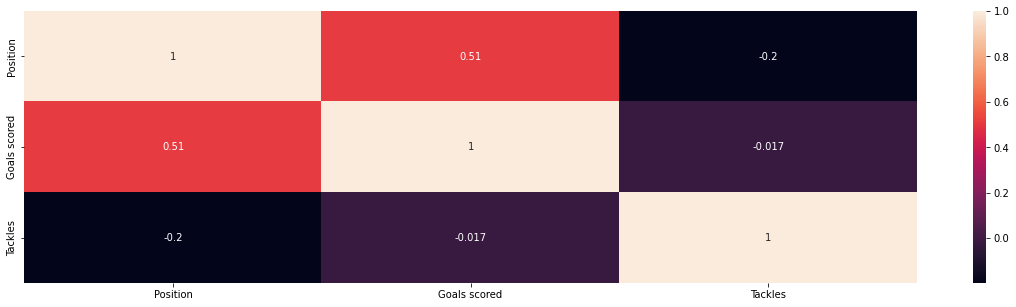

In [113]:
heat_attaquant =  data_heat.corr()

f, ax = plt.subplots(figsize=(20,5))
sb.heatmap(heat_attaquant, annot=True, ax = ax)

Coef corrélation entre Attaquant et But marqué = 0.51 

Coef corrélation entre Attaquant et Nombres de tacles = -0.2


Comparons avec le poste de défenseur maintenant

In [115]:
data_heat.Position = dataframe.Position.replace(to_replace = ["Forward", "Midfielder" , "Defender" ,"Goalkeeper"], value = [0,0,1,0]) ;data_heat

,Position,Goals scored,Tackles
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,1,0,12
...,...,...,...
551,0,0,0
552,0,0,0
553,0,8,9
554,0,6,0


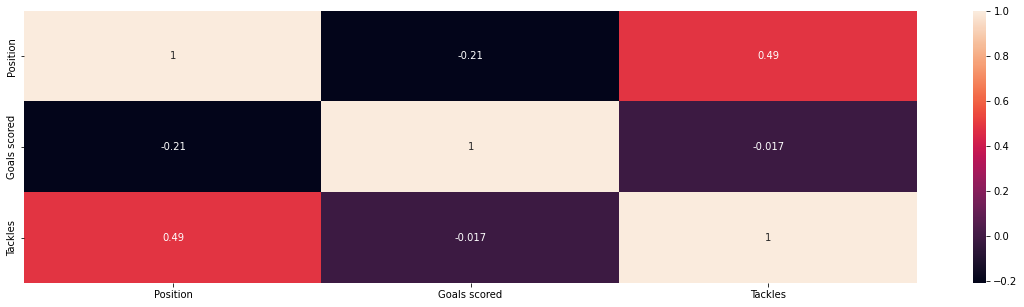

In [116]:
heat_attaquant =  data_heat.corr()

f, ax = plt.subplots(figsize=(20,5))
sb.heatmap(heat_attaquant, annot=True, ax = ax)

Coef corrélation entre Défenseur et But marqué = -0.21

Coef corrélation entre Défenseur et Nombres de tacles = 0.49



Différenciel pour les buts : 0.51 -> -0.2

Différenciel pour les tacles : -0.21 -> 0.49

Il faudra donc bien définir le poste du joueur que l'on souhaite recruter afin de pousser l'analyse sur les statistiques réellement pertinentes

Verification statistique :

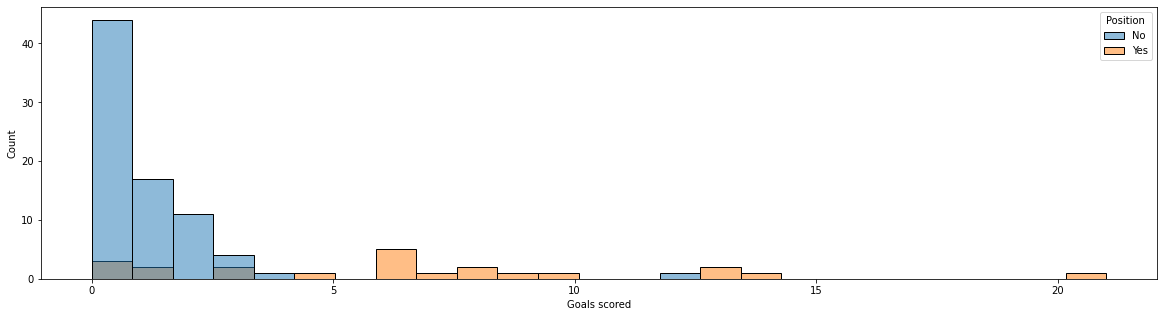

In [177]:
data_hist = pd.DataFrame(data=dataframe.sample(100), columns= ["Position","Goals scored","Tackles"])

data_hist.Position = dataframe.Position.replace(to_replace = ["Forward", "Midfielder" , "Defender" ,"Goalkeeper"], value = ["Yes","No","No","No"]) ;data_heat

f, ax = plt.subplots(figsize=(20,5))
sb.histplot(x = "Goals scored", hue='Position', data=data_hist, ax = ax)

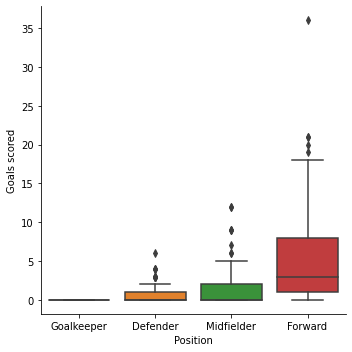

In [195]:
goal = pd.DataFrame(data=dataframe, columns= ["Goals scored","Position"])

sb.catplot(y = "Goals scored", x = "Position", data=goal, kind = 'box')

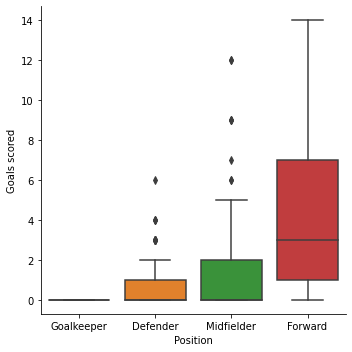

In [196]:
goal = goal[(goal['Goals scored']) < 15]

sb.catplot(y = "Goals scored", x = "Position", data=goal, kind = 'box')

On continuera l'analyse (recherche de joueurs) sur les attaquants

Déterminons maintenant les statistiques qui nous serviront de base à notre analyse soit toutes les statistiques significativement corrélées au poste d'attaquant

In [126]:
dataframe.Position = dataframe.Position.replace(to_replace = ["Forward", "Midfielder" , "Defender" ,"Goalkeeper"], value = [1,0,0,0]) ;

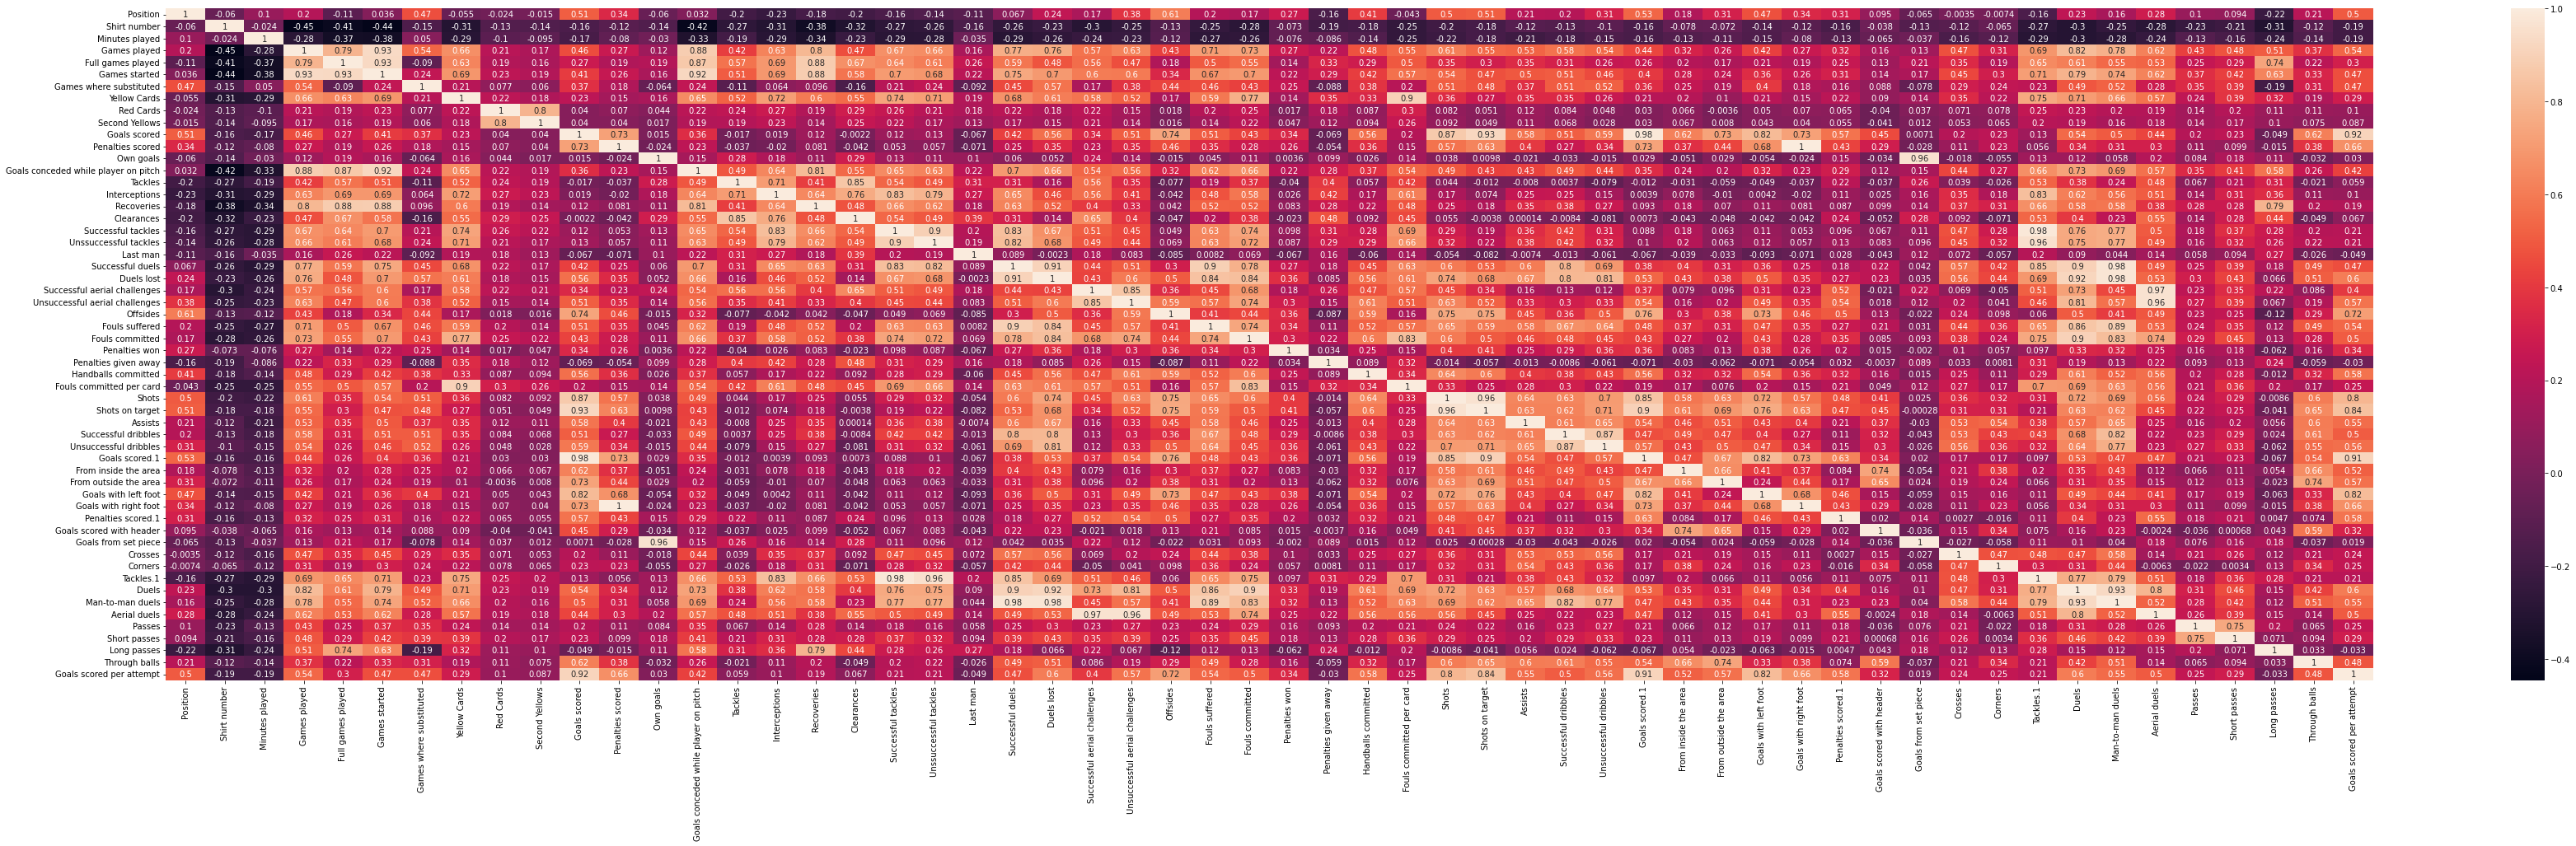

In [129]:
heat_attaquant_global =  dataframe.corr()

f, ax = plt.subplots(figsize=(60,15))
sb.heatmap(heat_attaquant_global, annot=True, ax = ax)

En lisant la colonne (ou ligne) "Position", on peut retenir comme caractéristiques les plus intéressantes :

- Goals scored
- Shot on target
- Goal scored per attempt

Donc les joueurs intéréssants à recruter devraient être ceux qui performent le mieux dans ces catégories

Commençons par trier les meilleurs dans l'ensemble de ces 3 domaines par rapport à la médiane

In [268]:
value = pd.DataFrame(data=dataframe, columns= ["Goals scored","Shots on target","Goals scored per attempt","Name"])

In [269]:
med_gs = value["Goals scored"].std()
med_sot = value["Shots on target"].std()
med_gspa = value["Goals scored per attempt"].std()

player_value = value[ (value["Goals scored"] > med_gs) & (value["Shots on target"] > med_sot) & (value["Goals scored per attempt"] > med_gspa) ]

print(player_value)

     Goals scored  Shots on target  Goals scored per attempt              Name
21              9               35                         4       Raúl García
26             13               33                         7          Williams
27              7               12                         6          Muniain 
45              4               20                         2              Saúl
54             15               46                         6         Griezmann
..            ...              ...                       ...               ...
547             4               11                         3        S. Cazorla
550             5               23                         2  Samuel Chukwueze
553             8               33                         6            Gerard
554             6               15                         5             Bacca
555            10               32                         5       Toko Ekambi

[66 rows x 4 columns]


On obtient encore 66 joueurs.

Continiuons à les filtrer en fonction du nombre de buts par tir cadré

In [270]:
new_column = (player_value["Goals scored"] / player_value["Shots on target"])

player_value.insert(loc = 0, column = "Goals per Shots on target", value = new_column )

In [271]:
player_value = player_value.sort_values(by=["Goals scored per attempt","Goals per Shots on target"], ascending=False)

player_value.head(5)

,Goals per Shots on target,Goals scored,Shots on target,Goals scored per attempt,Name
165,0.583333,14,24,10,Jorge Molina
307,0.606061,20,33,9,Iago Aspas
138,0.413793,36,87,9,Messi
163,0.560000,14,25,8,Mata
191,0.487179,19,39,8,Stuani


In [255]:
print(player_value)

#sb.catplot(x = "Goals scored", y = "Shots on target", data=player_value, kind = "bar")

     Goals per Shots on target  Goals scored  Shots  Shots on target  \
21                    0.257143             9     63               35   
26                    0.393939            13     56               33   
27                    0.583333             7     20               12   
45                    0.200000             4     40               20   
54                    0.326087            15     86               46   
..                         ...           ...    ...              ...   
547                   0.363636             4     22               11   
550                   0.217391             5     42               23   
553                   0.242424             8     54               33   
554                   0.400000             6     22               15   
555                   0.312500            10     49               32   

     Goals scored per attempt              Name  
21                          4       Raúl García  
26                          7      